In [1]:
import cv2 as cv
from PIL import Image as PIL_Image
import numpy as np
import math
from numpy.lib.function_base import disp
def houfline(img):
    #
    #cv.imshow("img",img)
    # cv.waitKey(0)
    # cv.destroyAllWindows()

    hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

    l_blue = np.array([[100,43,46]])
    h_blue = np.array([[124,255,255]])
    mask = cv.inRange(hsv, l_blue, h_blue)
    #res = cv.bitwise_and(img, img, mask = mask)
    # cv.imshow("img", img)
    #cv.imshow("mask", mask)
    # #cv.imshow("res", res)
    edges = cv.Canny(mask,50,150,apertureSize = 3)
    lines = cv.HoughLinesP(edges,1,np.pi/180,100,minLineLength=100,maxLineGap=10)
    if lines is None:
        return 0,0
    x1,y1,x2,y2 = lines[0][0]
    cv.line(img,(x1,y1),(x2,y2),(0,255,0),2)
    cv.imwrite("/home/xilinx/jupyter_notebooks/common/data/webcam.jpg",img)
    print(x1,y1,x2,y2)
    #shape (480, 640, 3)
    p = [0,240]
    b = y1-y2
    a = x1-x2
    c = -x1*y2 + y1*x2
    m = b/a
    #dis
    #print(a,b)
    dis = abs(a*p[1]+b*p[0]+c)/math.sqrt(a*a+b*b)
    #cv.line((x1,y1),(x2,y2),())
    flag = 0
    if (y1+2)/2 >240:
        flag = 1
    else:
        flag = 0
        
    return dis, m, flag

# img = cv.imread('/home/xilinx/jupyter_notebooks/common/data/bianyuan/0.jpg')
# [dis,m] = houfline(img)
# print(dis,m)

In [4]:
orig_img_path = '/home/xilinx/jupyter_notebooks/common/data/webcam.jpg'
!fswebcam  --no-banner --save {orig_img_path} -d /dev/video0 2
img = cv.imread('/home/xilinx/jupyter_notebooks/common/data/webcam.jpg')
[dis,m,flag] = houfline(img)
print(dis,m,flag)

--- Opening /dev/video0...
Trying source module v4l2...
/dev/video0 opened.
No input was specified, using the first.
Adjusting resolution from 384x288 to 640x480.
--- Capturing frame...
Captured frame in 0.00 seconds.
--- Processing captured image...
Disabling banner.
Writing JPEG image to '/home/xilinx/jupyter_notebooks/common/data/webcam.jpg'.
Writing JPEG image to '2'.
71 39 249 163
205.510296635 0.696629213483 0


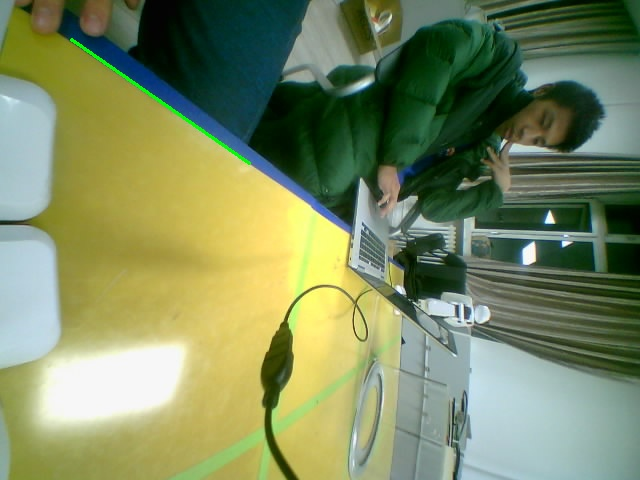

In [5]:
img2 = PIL_Image.open(orig_img_path)
img2